<div style="text-align: center;">
  <img src="Images/Placement.png" alt="Placement Illustration" width="600"/>
</div>

## Hello!
This is a project utilizing the **Placement Prediction Dataset** to analyze and predict student placement outcomes. By exploring this dataset, we aim to identify key factors that influence placement success and develop machine learning models for accurate classification of placement status.  

The dataset, available on [Kaggle](https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset), contains **10,000 rows** and **12 columns**, providing detailed academic and extracurricular records of students, along with their placement status. It is well-structured with no missing values, making it suitable for analysis and classification tasks. 

#### Dataset Overview
The dataset includes the following features:  

1. **CGPA**: Cumulative Grade Point Average, representing a student’s overall academic performance.  
2. **Internships**: The number of internships completed by a student.  
3. **Projects**: Number of projects undertaken by the student.  
4. **Workshops/Certifications**: Participation in workshops and online courses for skill enhancement.  
5. **Aptitude Test Score**: Measures a student’s quantitative and logical reasoning skills, often used in recruitment.  
6. **Soft Skills Rating**: Assesses communication and interpersonal skills.  
7. **Extracurricular Activities**: Indicates student involvement in non-academic activities.  
8. **Placement Training**: Training programs provided by colleges to help students prepare for placement.  
9. **SSC & HSC Marks**: Academic performance in Senior Secondary (SSC) and Higher Secondary (HSC) levels.  
10. **Placement Status**: The target variable, indicating whether a student was **Placed** or **Not Placed**.  

#### Project Inspiration  
This project is inspired by the need to analyze key factors affecting student placements and build predictive models to assist career guidance efforts. Understanding the most influential attributes can help students and institutions improve placement strategies.  

#### Goals of the Project  
1. **Data Analysis**: Explore the dataset to identify trends and correlations among academic, training, and extracurricular features.  
2. **Classification Models**: Develop and evaluate machine learning models to predict placement status based on the provided features.  

> ⚠️ *Disclaimer*: The goal is to build predictive tools and derive insights—not to stereotype or oversimplify student capabilities. Ethical analysis and transparency are essential.

# **Step 4: Modeling & Prediction**

In this step, we build machine learning models to predict Placement Status using the cleaned and preprocessed dataset. This includes training, evaluating, tuning models, and analyzing important features.

---

### Objectives of This Notebook

1. [Import Libraries and Load the Dataset](#import)  
2. [Feature Engineering](#engineering)  
3. [Split the Dataset into Features and Target](#split)
4. [Train and Evaluate Models](#models)  
5. [Hyperparameter Tuning](#tuning)  
   - [Random Forest Metrics](#rf-metrics)  
   - [K-Nearest Neighbors Metrics](#knn-metrics)  
   - [Gradient Boosting Metrics](#gb-metrics)  
6. [Model Evaluation and Comparison](#evaluation)  

---

### Previous Step

- Step 3: [EDA – SQL Queries](./03_eda_sql_queries.ipynb)

---

<a id="import"></a>

## **4.1 Import Libraries and Load the Dataset**

We begin by importing essential libraries for data processing, modeling, and evaluation. The cleaned dataset is then loaded into a DataFrame.

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [2]:
# Standard Scaler allows us to standardize our features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Tools for splitting the data into training and test sets, and for performing cross-validation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

# Importing K-Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Importing Gradient Boosting and Random Forest classification algorithms for ensemble learning
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Tools for evaluating model performance with metrics like confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

# Additional metrics for evaluating accuracy, precision, recall, and F1 score of models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Used to visually display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [3]:
# Load the dataset
print("Previewing the raw dataset:")
df = pd.read_csv('placement_encoded.csv')
display(df.head())

Previewing the raw dataset:


,cgpa,internships,projects,trainings,aptitudetestscore,softskillsrating,ecas,placementtraining,ssc_marks,hsc_marks,placementstatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1


---

<a id="engineering"></a>  

## **4.2 Feature Engineering** 

This section handles data transformations to improve model performance.

In [4]:
# Standardize the features using StandardScaler to remove the mean and scale to unit variance
scaler = StandardScaler()

# Specify the features we want to scale
features = ['cgpa', 'aptitudetestscore', 'softskillsrating', 'ssc_marks', 'hsc_marks']

# Fit the scaler on the selected features and apply the transformation
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

df_scaled

,cgpa,internships,projects,trainings,aptitudetestscore,softskillsrating,ecas,placementtraining,ssc_marks,hsc_marks,placementstatus
0,-0.303075,1,1,1,-1.766016,0.192906,0,0,-0.776106,0.513882,0
1,1.884668,0,3,2,1.305058,-0.779879,1,1,0.854092,0.850910,1
2,-0.615610,1,2,2,0.322314,1.165690,1,0,0.949986,0.626224,0
3,-0.303075,1,1,2,0.690843,0.192906,1,1,1.141774,0.626224,1
4,0.947064,1,2,2,0.813686,0.436102,1,1,0.470516,1.524966,1
...,...,...,...,...,...,...,...,...,...,...,...
9923,-0.303075,1,1,2,-0.906115,-1.023075,1,0,1.525350,-0.946573,0
9924,-0.459342,0,1,0,1.305058,1.165690,0,0,1.429456,-0.834230,1
9925,1.103331,1,3,0,-1.151801,1.165690,1,1,0.949986,0.738567,1
9926,1.884668,0,3,2,0.936529,1.165690,1,1,0.182834,1.187938,1


---

<a id="split"></a>  

## **4.3 Split the Dataset into Features and Target**  

The dataset is divided into independent variables (features) and the dependent variable (`placement`) for model training.


In [5]:
# Split the dataset into features (X) and target (y)
X = df_scaled.drop(columns=['placementstatus'],axis=1)
y = df_scaled['placementstatus']

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [7]:
# Print the shapes of the full dataset and the resulting splits
print(f'Data shape for X: {X.shape} \
    \nData shape for y: {y.shape} \
        \nData shape for X_train: {X_train.shape} \
            \nData shape for X_test: {X_test.shape} \
                \nData shape for y_train: {y_train.shape} \
                    \nData shape for y_test: {y_test.shape}')

Data shape for X: (9928, 10)     
Data shape for y: (9928,)         
Data shape for X_train: (7942, 10)             
Data shape for X_test: (1986, 10)                 
Data shape for y_train: (7942,)                     
Data shape for y_test: (1986,)


#### Now the data is ready for Modelling

---

<a id="models"></a>  

## **4.4 Train and Evaluate Multiple Models**  

Train several classification algorithms and evaluate their initial performance using standard metrics.

In [8]:
# Calculating metrics for each model
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'RF': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    precision_macro = precision_score(y_test, y_pred, average='macro')
    precision_each = precision_score(y_test, y_pred, average=None)
    recall_macro = recall_score(y_test, y_pred, average='macro')
    recall_each = recall_score(y_test, y_pred, average=None)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_each = f1_score(y_test, y_pred, average=None)

    cv_scores = cross_val_score(model, X_train, y_train, cv=5).round(4)
    avg_cv_score = cv_scores.mean()

    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Average Precision: {precision_macro:.4f}")
    print(f"  Precision (Not Placed, Placed): {precision_each}")
    print(f"  Average Recall: {recall_macro:.4f}")
    print(f"  Recall (Not Placed, Placed): {recall_each}")
    print(f"  Average F1-score: {f1_macro:.4f}")
    print(f"  F1-score (Not Placed, Placed): {f1_each}")
    print(f"  Cross-Validation Scores: {cv_scores}")
    print(f"  Average CV Score: {avg_cv_score:.4f}")
    print("-" * 75)

Decision Tree:
  Accuracy: 0.7069
  Average Precision: 0.6976
  Precision (Not Placed, Placed): [0.75128645 0.64390244]
  Average Recall: 0.6977
  Recall (Not Placed, Placed): [0.75       0.64547677]
  Average F1-score: 0.6977
  F1-score (Not Placed, Placed): [0.75064267 0.64468864]
  Cross-Validation Scores: [0.7237 0.7093 0.7009 0.6965 0.7179]
  Average CV Score: 0.7097
---------------------------------------------------------------------------
KNN:
  Accuracy: 0.7774
  Average Precision: 0.7703
  Precision (Not Placed, Placed): [0.81185567 0.72871046]
  Average Recall: 0.7707
  Recall (Not Placed, Placed): [0.80907534 0.73227384]
  Average F1-score: 0.7705
  F1-score (Not Placed, Placed): [0.81046312 0.7304878 ]
  Cross-Validation Scores: [0.7823 0.7697 0.7733 0.7544 0.7853]
  Average CV Score: 0.7730
---------------------------------------------------------------------------
RF:
  Accuracy: 0.7860
  Average Precision: 0.7805
  Precision (Not Placed, Placed): [0.804758   0.75619296]

### **Insights from Model Performance on Placement Prediction**  

#### **1. Comparison of Model Predictions by Class** 
| Model              | Accuracy | Precision (Not Placed, Placed) | Recall (Not Placed, Placed) | F1-Score (Not Placed, Placed) |
|--------------------|----------|--------------------------------|-----------------------------|--------------------------------|
| **Decision Tree**  | 70.69%   | [0.751, 0.644]                | [0.750, 0.645]             | [0.750, 0.644]                |
| **KNN**           | 77.74%   | [0.812, 0.729]                | [0.809, 0.732]             | [0.810, 0.730]                |
| **Random Forest** | 78.60%   | [0.805, 0.756]                | [0.839, 0.709]             | [0.822, 0.731]                |
| **Gradient Boosting** | **79.56%**   | **[0.827, 0.751]**          | **[0.825, 0.753]**         | **[0.826, 0.752]**            |

Each model exhibits varying performance when predicting **"Placed"** and **"Not Placed"** candidates.  
- Decision Tree has a more balanced recall and precision but performs the weakest overall.  
- KNN shows slightly lower precision for the "Placed" class but improves recall compared to Decision Tree.  
- Random Forest boosts recall for "Not Placed" (83.99%), ensuring fewer false negatives.  
- Gradient Boosting has the most balanced performance, with high recall and precision across both classes.  

#### **2. Accuracy Comparison**
- Gradient Boosting (79.56%) performs the best, closely followed by Random Forest (78.60%) and KNN (77.74%).  
- Decision Tree (70.69%) is the least accurate, likely due to overfitting and lack of robustness.  

#### **3. Why KNN, Random Forest, and Gradient Boosting Were Chosen**
| Model              | CV Scores                         | Avg CV Score |
|--------------------|---------------------------------|--------------|
| **Decision Tree**  | [0.7237, 0.7093, 0.7009, 0.6965, 0.7179] | **70.97%** |
| **KNN**           | [0.7823, 0.7697, 0.7733, 0.7544, 0.7853] | **77.30%** |
| **Random Forest** | [0.7930, 0.7709, 0.7790, 0.7903, 0.7979] | **78.62%** |
| **Gradient Boosting** | [0.8018, 0.7879, 0.7960, 0.7947, 0.8073] | **79.75%** |

- KNN was selected for its ability to capture local patterns in the data, performing well in cross-validation (77.30% avg CV score).  
- Random Forest was chosen for its balance between high recall and precision, along with strong cross-validation performance (78.62% avg CV score).  
- Gradient Boosting stood out as the best performer due to its strong generalization, highest accuracy (79.56%), and best cross-validation score (79.75%).  

#### **4. General Insights**  
- Decision Tree struggles with generalization, making it unreliable for this dataset.  
- KNN is decent but slightly less precise in identifying placed students.  
- Random Forest is strong in recall, which is good for reducing false negatives.
- Ensemble models (Random Forest & Gradient Boosting) outperform single learners like Decision Trees.  
- Gradient Boosting is the best overall, offering balanced performance, high accuracy, and robustness across datasets.
- Higher recall in "Not Placed" ensures fewer misclassified unplaced students, making RF & GB ideal choices.

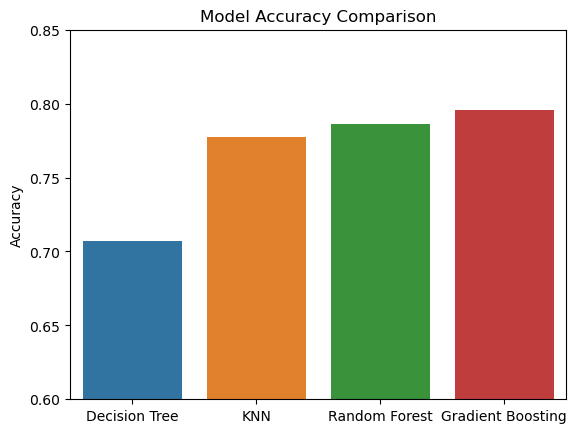

In [9]:
models = ["Decision Tree", "KNN", "Random Forest", "Gradient Boosting"]
accuracy_scores = [0.7069, 0.7774, 0.7860, 0.7956]

sns.barplot(x=models, y=accuracy_scores, hue=models, palette=sns.color_palette("tab10", 4))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.6, 0.85)
plt.show()

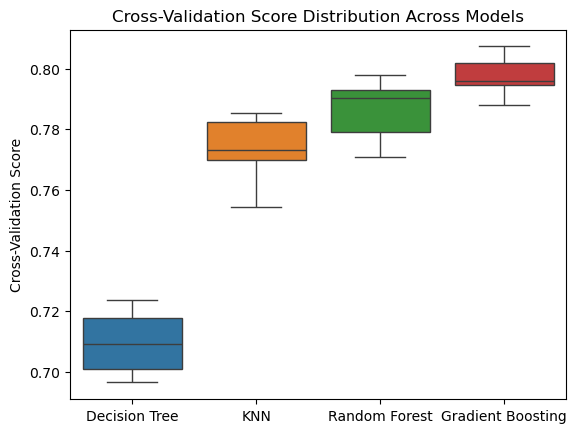

In [10]:
cv_scores = {
    "Decision Tree": [0.7237, 0.7093, 0.7009, 0.6965, 0.7179],
    "KNN": [0.7823, 0.7697, 0.7733, 0.7544, 0.7853],
    "Random Forest": [0.793, 0.7709, 0.779, 0.7903, 0.7979],
    "Gradient Boosting": [0.8018, 0.7879, 0.796, 0.7947, 0.8073]
}

sns.boxplot(data=list(cv_scores.values()), palette=sns.color_palette("tab10", 4))
plt.xticks(ticks=np.arange(len(models)), labels=models)
plt.ylabel("Cross-Validation Score")
plt.title("Cross-Validation Score Distribution Across Models")
plt.show()

---

<a id="tuning"></a>  

## **4.5 Hyperparameter Tuning**  

Improve model performance by finding the optimal combination of hyperparameters.

<a id="rf-metrics"></a> 

### **4.5.1 Random Forest Classifier Metrics**

This section presents the evaluation metrics for the Random Forest Classifier model, measuring its performance in predicting placement status. 

In [11]:
# RandomizedSearchCV on the Other Models to fine-tune these models for better performance
rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), 
    param_distributions={
        "n_estimators": np.arange(50, 500, 50),
        "max_depth": [None, 10, 20, 30, 40, 50],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2", None],
        "bootstrap": [True, False],
        "criterion": ["gini", "entropy"],
    },
    n_iter=50,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

# training the Random Forest Classifier final model
rf_search.fit(X_train, y_train)

print(f"The Best Random Forest Classifier parameters are: {rf_search.best_params_}")
print(f"The Best Random Forest Classifier Accuracy : {rf_search.best_score_}")

The Best Random Forest Classifier parameters are: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'entropy', 'bootstrap': True}
The Best Random Forest Classifier Accuracy : 0.7966517287459597


In [12]:
# Use the best model to make predictions
rf = RandomForestClassifier(**rf_search.best_params_, random_state=45)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=4,
                       n_estimators=400, random_state=45)

In [13]:
# Predicting the target
rf_pred = rf.predict(X_test)

In [14]:
# Evaluate the tuned model
rf_test_score = rf.score(X_test, y_test)
rf_cv_score = cross_val_score(rf, X, y, cv=10, scoring='accuracy').round(4)
rf_average_score = rf_cv_score.mean()

print(f"Test Set Score for the best RF: {rf_test_score:.4f} \n")
print(f"CV Scores for the best RF: {rf_cv_score} \n")
print("Average Cross-Validation Score for the best RF:", rf_average_score)

Test Set Score for the best RF: 0.7986 

CV Scores for the best RF: [0.7825 0.7865 0.7865 0.7885 0.7925 0.8167 0.7986 0.7895 0.7903 0.8065] 

Average Cross-Validation Score for the best RF: 0.79381


#### **Comparison of Random Forest Performance Before and After Hyperparameter Tuning**

<div align="center">

| Metric                          | Before Tuning            | After Tuning             | Difference            |
|---------------------------------|--------------------------|--------------------------|-----------------------|
| **Test Set Score**              | 78.60%                   | 79.86%                   | **+1.26%**           |
| **Average Cross-Validation Score** | 78.62%                   | 79.38%                   | **+0.76%**           |
| **CV Score Range**              | 77.09% - 79.79%          | 78.25% - 81.67%          | **Expanded Slightly** |

</div>

#### Analysis:

- The test set score improved by 1.26%, indicating that hyperparameter tuning helped enhance generalization.  
- The average cross-validation score increased by 0.76%, reflecting a more robust and optimized model.  
- The range of cross-validation scores widened, suggesting slight variations across different folds, likely due to the refined model capturing more complexity.  

Overall, hyperparameter tuning led to a noticeable improvement in accuracy and consistency, making the Random Forest model more effective.

In [15]:
# Making a Classification Report for the Model
print(f'Classification Report for Best Random Forest Classifier Prediction = \
    \n{classification_report(y_test, rf_pred)}')

Classification Report for Best Random Forest Classifier Prediction =     
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1168
           1       0.76      0.75      0.75       818

    accuracy                           0.80      1986
   macro avg       0.79      0.79      0.79      1986
weighted avg       0.80      0.80      0.80      1986



In [16]:
# Class-wise metrics for Random Forest Classifier

# Generate classification report as a dictionary
rf_report = classification_report(y_test, rf_pred, output_dict=True, zero_division=1)

# Extract precision, recall, and F1-score for each class
rf_precision_0 = rf_report["0"]["precision"]
rf_precision_1 = rf_report["1"]["precision"]
rf_recall_0 = rf_report["0"]["recall"]
rf_recall_1 = rf_report["1"]["recall"]
rf_f1_0 = rf_report["0"]["f1-score"]
rf_f1_1 = rf_report["1"]["f1-score"]

# Calculate overall accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)

# Display metrics for Random Forest Classifier
print("Best Random Forest Classifier Predictions -")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1-Score (Not Placed): {rf_f1_0:.4f}, F1-Score (Placed): {rf_f1_1:.4f}")
print(f"Precision (0): {rf_precision_0:.4f}, Precision (1): {rf_precision_1:.4f}")
print(f"Recall (0): {rf_recall_0:.4f}, Recall (1): {rf_recall_1:.4f}")


Best Random Forest Classifier Predictions -
Accuracy: 0.7986
F1-Score (Not Placed): 0.8299, F1-Score (Placed): 0.7531
Precision (0): 0.8243, Precision (1): 0.7606
Recall (0): 0.8356, Recall (1): 0.7457


#### **Random Forest Classifier Before and After Hyperparameter Tuning**  

<div align="center">

| Metric/Class        | Before Tuning  | After Tuning  | Difference  |
|---------------------|---------------|--------------|-------------|
| **Accuracy**        | 78.60%        | 79.86%       | **+1.26%**  |
| **Not Placed Precision** | 80.48%  | 82.43%  | **+1.95%**  |
| **Not Placed Recall**    | 83.99%  | 83.56%  | **-0.43%**  |
| **Not Placed F1-Score**  | 82.20%  | 82.99%  | **+0.79%**  |
| **Placed Precision**     | 75.62%  | 76.06%  | **+0.44%**  |
| **Placed Recall**        | 70.90%  | 74.57%  | **+3.67%**  |
| **Placed F1-Score**      | 73.19%  | 75.31%  | **+2.12%**  |

</div>

#### Analysis  

- Accuracy improved by 1.26%, indicating an overall better-performing model.  
- Not Placed Class:  
  - Precision increased by 1.95%, meaning the model is better at correctly identifying students who won’t be placed.  
  - Recall slightly decreased by 0.43%, implying a few more actual "Not Placed" students were missed.  
  - F1-score increased by 0.79%, balancing the changes in precision and recall.  
- Placed Class:  
  - Precision improved by 0.44%, slightly reducing false positives.  
  - Recall had a strong increase of 3.67%, meaning the model captures more students who are actually placed.  
  - F1-score increased by 2.12%, indicating a more balanced classification performance.  

#### Overall Insights  

After hyperparameter tuning, Random Forest showed noticeable improvements, particularly in detecting "Placed" students. The recall increase of 3.67% ensures that more actual "Placed" students are identified, making the model more useful in real-world applications. The minor drop in Not Placed recall (-0.43%) is compensated by higher precision, meaning the model is more confident in its classifications.  

Overall, these refinements make the tuned model more reliable and better suited for placement predictions.

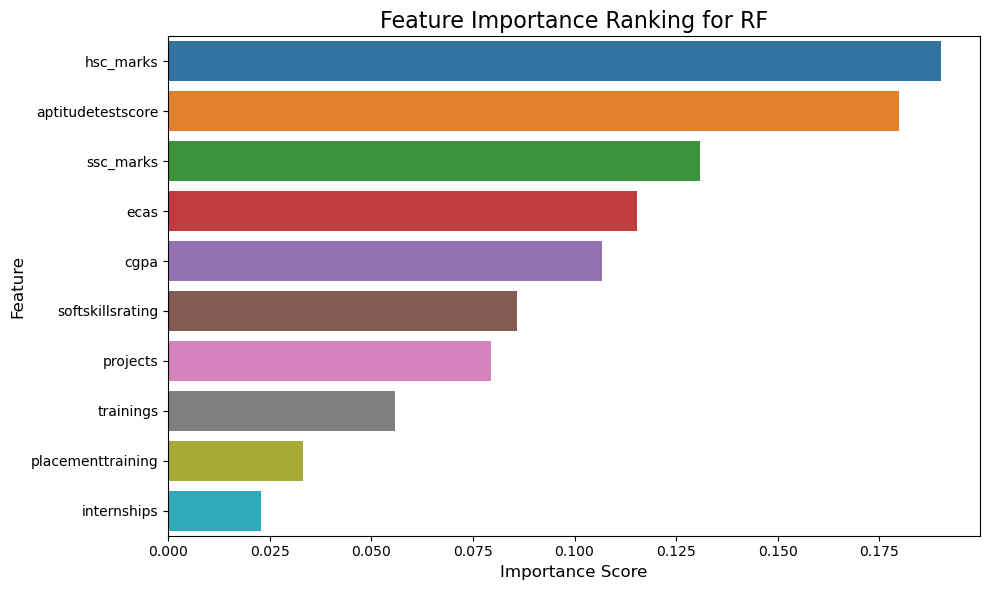

In [17]:
# Checking which features contributes the Gradient Boosting Classifier model's prediction
rf_importances = rf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(rf_importances)[::-1]

# Plotting a DataFrame for better visualization
rf_data = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})

rf_data = rf_data.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_data, hue='Feature',legend=False)
plt.title('Feature Importance Ranking for RF', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

#### **Summary of Feature Importance for Random Forest**

The feature importance graph highlights the key variables influencing the model's predictions for placement.  

- HSC_Marks is the most critical feature, showing the highest importance score.  
- AptitudeTestScore and SSC_Marks are also significant contributors to the model's predictions.  
- Extracurricular Activities, CGPA, and Soft Skills Rating have a moderate influence.  
- Projects and Workshops/Certifications have a smaller impact but still contribute to predictions.  
- Placement Training and Internships show the least importance, indicating they have minimal effect on placement outcomes.  

This suggests that academic performance (HSC, SSC, CGPA) and aptitude tests are the strongest predictors, while extracurricular and soft skills also play a role but to a lesser extent. Training and internships seem to have the least influence, which may indicate a need for reconsidering their weight in career readiness programs.

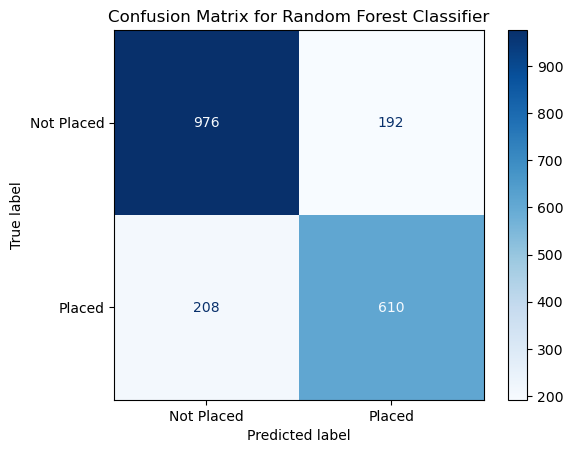

In [18]:
# Making a Confusion Matrix for the Model
rf_cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, 
                              display_labels=["Not Placed", "Placed"])
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix for Random Forest Classifier")
plt.show()

#### **Confusion Matrix Summary for Random Forest Classifier**  

- True Positives (Diagonal Elements):  
  - **Not Placed:** 976 instances were correctly predicted as not placed.  
  - **Placed:** 610 instances were correctly predicted as placed.  

- False Positives (Off-Diagonal Elements):  
  - **Not Placed:** 192 instances were misclassified as placed.  
  - **Placed:** 208 instances were misclassified as not placed.  

#### Observations:  
- The Random Forest model performs well, correctly classifying most instances. The model shows a fair balance between false positives and false negatives.
- 192 not placed students were incorrectly classified as placed, which could lead to overestimation of placement rates.  
- 208 placed students were misclassified as not placed, meaning some students who should be placed were missed.

<a id="knn-metrics"></a> 

### **4.5.2 KNeighbors Neighbors Classifier Metrics**

This section presents the evaluation metrics for the KNeighbors Neighbors Classifier model, assessing its effectiveness in classifying placement status.

In [19]:
# Using RandomizedSearchCV on the KNeighbors Neighbors to get it's best parameters
knn_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions={
        "n_neighbors": np.arange(1, 50, 1),
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"],
        "p": [1, 2]
    },
    cv=5,
    n_iter=50,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1)

# training the K-Nearest Neighbors Classifier final model
knn_search.fit(X_train,y_train) 

print(f"The Best KNN parameters are: {knn_search.best_params_}")
print(f"The Best KNN Accuracy : {knn_search.best_score_}")

The Best KNN parameters are: {'weights': 'uniform', 'p': 1, 'n_neighbors': 49, 'metric': 'minkowski'}
The Best KNN Accuracy : 0.797658730599065


In [20]:
# New Model using the Best Estimators
knn = KNeighborsClassifier(**knn_search.best_params_)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=49, p=1)

In [21]:
# Predicting the target
knn_pred = knn.predict(X_test)

In [22]:
# Evaluate on training and test sets
knn_test_score = knn.score(X_test, y_test)
knn_cv_score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').round(4)
knn_average_score = knn_cv_score.mean()

print(f"Test Set Score for Best KNN: {knn_test_score:.4f} \n")
print(f"CV Scores for Best KNN: {knn_cv_score} \n")
print("Average Cross-Validation Score for Best KNN:", knn_average_score)

Test Set Score for Best KNN: 0.7951 

CV Scores for Best KNN: [0.7825 0.7835 0.7875 0.7895 0.7905 0.8107 0.7815 0.8087 0.7782 0.8014] 

Average Cross-Validation Score for Best KNN: 0.7914


#### **Comparison of K-Nearest Neighbors (KNN) Performance Before and After Hyperparameter Tuning**

<div align="center"> 

| Metric                          | Before Tuning            | After Tuning             | Difference            |
|---------------------------------|--------------------------|--------------------------|-----------------------|
| **Test Set Score**              | 77.74%                   | 79.51%                   | **+1.77%**           |
| **Average Cross-Validation Score** | 77.30%                   | 79.14%                   | **+1.84%**           |
| **CV Score Range**              | 75.44% - 78.53%          | 77.82% - 81.07%          | **Expanded Slightly** |

</div>

#### Analysis:

- The test set score improved by 1.77%, indicating better generalization after hyperparameter tuning.  
- The average cross-validation score increased by 1.84%, demonstrating a more consistent and optimized performance across different folds.  
- The range of cross-validation scores widened slightly, suggesting that tuning helped capture more complex relationships in the data, though with minor variability.  

Overall, tuning significantly enhanced KNN’s accuracy and stability, making it a stronger model for classification.

In [23]:
# Making a Classification Report for the Model
print(f'Classification Report for Best K-Nearest Neighbors Classifier Prediction = \
    \n{classification_report(y_test, knn_pred)}')

Classification Report for Best K-Nearest Neighbors Classifier Prediction =     
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1168
           1       0.75      0.76      0.75       818

    accuracy                           0.80      1986
   macro avg       0.79      0.79      0.79      1986
weighted avg       0.80      0.80      0.80      1986



In [24]:
# Class-wise metrics for K-Nearest Neighbors Classifier

# Generate classification report as a dictionary
knn_report = classification_report(y_test, knn_pred, output_dict=True, zero_division=1)

# Extract precision, recall, and F1-score for each class
knn_precision_0 = knn_report["0"]["precision"]
knn_precision_1 = knn_report["1"]["precision"]
knn_recall_0 = knn_report["0"]["recall"]
knn_recall_1 = knn_report["1"]["recall"]
knn_f1_0 = knn_report["0"]["f1-score"]
knn_f1_1 = knn_report["1"]["f1-score"]

# Calculate overall accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)

# Display metrics for K-Nearest Neighbors Classifier
print("Best K-Nearest Neighbors Classifier Predictions -")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"F1-Score (Not Placed): {knn_f1_0:.4f}, F1-Score (Placed): {knn_f1_1:.4f}")
print(f"Precision (0): {knn_precision_0:.4f}, Precision (1): {knn_precision_1:.4f}")
print(f"Recall (0): {knn_recall_0:.4f}, Recall (1): {knn_recall_1:.4f}")


Best K-Nearest Neighbors Classifier Predictions -
Accuracy: 0.7951
F1-Score (Not Placed): 0.8246, F1-Score (Placed): 0.7535
Precision (0): 0.8300, Precision (1): 0.7467
Recall (0): 0.8193, Recall (1): 0.7604


#### **K-Nearest Neighbors (KNN) Classifier Before and After Hyperparameter Tuning**

<div align="center">

| Metric/Class        | Before Tuning      | After Tuning       | Difference        |
|---------------------|--------------------|--------------------|-------------------|
| **Accuracy**        | 77.74%             | 79.51%             | **+1.77%**        |
| **Not Placed Precision** | 81.19%     | 83.00%     | **+1.81%**        |
| **Not Placed Recall**    | 80.91%     | 81.93%     | **+1.02%**        |
| **Not Placed F1-Score**  | 81.05%     | 82.46%     | **+1.41%**        |
| **Placed Precision**     | 72.87%     | 74.67%     | **+1.80%**        |
| **Placed Recall**        | 73.23%     | 76.04%     | **+2.81%**        |
| **Placed F1-Score**      | 73.05%     | 75.35%     | **+2.30%**        |

</div>

#### Analysis:

- Accuracy improved by 1.77%, showing a more precise model overall.  
- Not Placed Class:  
  - Precision increased by 1.81%, indicating fewer false positives.  
  - Recall improved slightly by 1.02%, meaning the model captures more "Not Placed" cases.  
  - F1-score increased by 1.41%, balancing precision and recall improvements.  
- Placed Class:  
  - Precision improved by 1.80%, making predictions more reliable.  
  - Recall increased significantly by 2.81%, meaning more "Placed" students are correctly identified.  
  - F1-score rose by 2.30%, showing a well-balanced improvement.  

#### Overall Insights:

After hyperparameter tuning, KNN demonstrated a strong boost in recall and F1-score, particularly for the "Placed" class. The model is now better at identifying placed students, making it a more balanced and effective classifier for placement prediction.


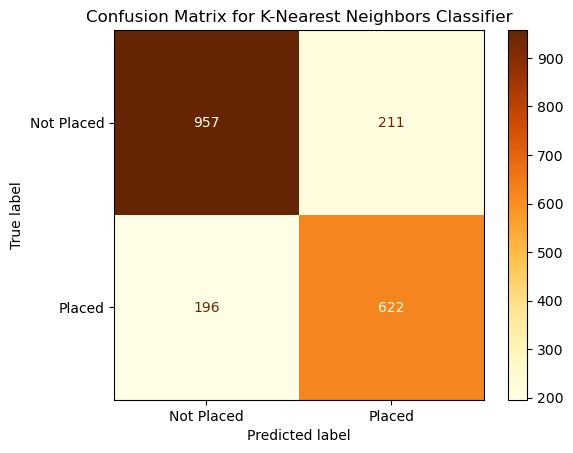

In [25]:
# Making a Confusion Matrix for the Model
knn_cm = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, 
                              display_labels=["Not Placed", "Placed"])
disp.plot(cmap='YlOrBr')
disp.ax_.set_title("Confusion Matrix for K-Nearest Neighbors Classifier")
plt.show()

#### **Confusion Matrix Summary for K-Nearest Neighbors (KNN) Classifier**

- True Positives (Diagonal Elements):  
    - Not Placed: 957 instances were correctly predicted as not placed.  
  - Placed: 622 instances were correctly predicted as placed.  

- False Positives (Off-Diagonal Elements):  
  - Not Placed: 211 instances were misclassified as placed.  
  - Placed: 196 instances were misclassified as not placed.  

#### Observations:  
- The KNN classifier performs similarly to the Random Forest model, with slightly more misclassified "Not Placed" instances.  
- 211 not placed students were incorrectly classified as placed, which could give a slightly inflated placement rate.  
- 196 placed students were misclassified as not placed, which is a lower error compared to the Random Forest model.  
- The KNN model shows a marginally better false negative rate (196 vs. 208 in RF), meaning it predicts placed students more accurately.

<a id="gb-metrics"></a> 

### **4.5.3 Gradient Boosting Classifier Metrics**

This section covers the performance metrics for the Gradient Boosting Classifier model in predicting depression.

In [26]:
gb_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions={
        'n_estimators': [100, 300, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'criterion': ['friedman_mse', 'squared_error'],
        'max_features': ['sqrt', 'log2'],
        'loss': ['log_loss', 'exponential']
        },
    scoring='accuracy',
    cv=5,
    n_iter=50,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# training the Gradient Boosting Classifier final model
gb_search.fit(X_train, y_train)

print(f"The Best Gradient Boosting Classifier parameters are: {gb_search.best_params_}")
print(f"The Best Gradient Boosting Classifier Accuracy : {gb_search.best_score_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
The Best Gradient Boosting Classifier parameters are: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.01, 'criterion': 'squared_error'}
The Best Gradient Boosting Classifier Accuracy : 0.7999252575562787


In [27]:
# New Model using the Best Estimators
gb = GradientBoostingClassifier(**gb_search.best_params_, random_state=8)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.01,
                           loss='exponential', max_features='sqrt',
                           min_samples_leaf=2, min_samples_split=5,
                           n_estimators=500, random_state=8, subsample=0.8)

In [28]:
# Predicting the target
gb_pred = gb.predict(X_test)

In [29]:
# Testng the model on the Training Set to Underfitting Check.
gb_test_score = gb.score(X_test, y_test)
gb_cv_score = cross_val_score(gb, X, y, cv=10, scoring='accuracy').round(4)
gb_average_score = gb_cv_score.mean()

print(f"Test Set Score for the best GB: {gb_test_score:.4f} \n")
print(f"CV Scores for the best GB: {gb_cv_score} \n")
print("Average Cross-Validation Score for the best GB:", gb_average_score)

Test Set Score for the best GB: 0.8011 

CV Scores for the best GB: [0.8016 0.7875 0.8026 0.7875 0.8066 0.8127 0.7855 0.8046 0.7903 0.7994] 

Average Cross-Validation Score for the best GB: 0.79783


#### **Comparison of Gradient Boosting (GB) Performance Before and After Hyperparameter Tuning**

<div align="center">  

| Metric                          | Before Tuning            | After Tuning             | Difference            |
|---------------------------------|--------------------------|--------------------------|-----------------------|
| **Test Set Score**              | 79.56%                   | 80.11%                   | **+0.55%**           |
| **Average Cross-Validation Score** | 79.75%                   | 79.78%                   | **+0.03%**           |
| **CV Score Range**              | 78.79% - 80.73%          | 78.55% - 81.27%          | **Slightly Expanded** |

</div>

#### Analysis

- The test set score improved by 0.55%, showing a slight enhancement in generalization after tuning.  
- The average cross-validation score increased by 0.03%, indicating minor but consistent optimization.  
- The CV score range slightly expanded, suggesting that tuning introduced some variability but also allowed the model to capture patterns more effectively.  

Overall, while Gradient Boosting already performed well before tuning, the fine-tuning process helped improve stability and generalization slightly, making it a more reliable model.

In [30]:
# Making a Classification Report for the Model
print(f'Classification Report for The Best Gradient Boosting Classifier Prediction = \
    \n{classification_report(y_test, gb_pred)}')

Classification Report for The Best Gradient Boosting Classifier Prediction =     
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1168
           1       0.76      0.75      0.76       818

    accuracy                           0.80      1986
   macro avg       0.79      0.79      0.79      1986
weighted avg       0.80      0.80      0.80      1986



In [31]:
# Class-wise metrics for Gradient Boosting Classifier

# Generate classification report as a dictionary
gb_report = classification_report(y_test, gb_pred, output_dict=True, zero_division=1)

# Extract precision, recall, and F1-score for each class
gb_precision_0 = gb_report["0"]["precision"]
gb_precision_1 = gb_report["1"]["precision"]
gb_recall_0 = gb_report["0"]["recall"]
gb_recall_1 = gb_report["1"]["recall"]
gb_f1_0 = gb_report["0"]["f1-score"]
gb_f1_1 = gb_report["1"]["f1-score"]

# Calculate overall accuracy
gb_accuracy = accuracy_score(y_test, gb_pred)

# Display metrics for Gradient Boosting Classifier
print("Best Gradient Boosting Classifier Predictions -")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"F1-Score (Not Placed): {gb_f1_0:.4f}, F1-Score (Placed): {gb_f1_1:.4f}")
print(f"Precision (0): {gb_precision_0:.4f}, Precision (1): {gb_precision_1:.4f}")
print(f"Recall (0): {gb_recall_0:.4f}, Recall (1): {gb_recall_1:.4f}")


Best Gradient Boosting Classifier Predictions -
Accuracy: 0.8011
F1-Score (Not Placed): 0.8316, F1-Score (Placed): 0.7572
Precision (0): 0.8284, Precision (1): 0.7614
Recall (0): 0.8348, Recall (1): 0.7531


#### **Gradient Boosting Classifier Before and After Hyperparameter Tuning**  

<div align="center"> 

| Metric/Class        | Before Tuning  | After Tuning  | Difference  |
|---------------------|---------------|--------------|-------------|
| **Accuracy**        | 79.56%        | 80.11%       | **+0.55%**  |
| **Not Placed Precision** | 82.68%  | 82.84%  | **+0.16%**  |
| **Not Placed Recall**    | 82.53%  | 83.48%  | **+0.95%**  |
| **Not Placed F1-Score**  | 82.60%  | 83.16%  | **+0.56%**  |
| **Placed Precision**     | 75.12%  | 76.14%  | **+1.02%**  |
| **Placed Recall**        | 75.31%  | 75.31%  | **+0%**  |
| **Placed F1-Score**      | 75.21%  | 75.72%  | **+0.51%**  |

</div>

#### Analysis  

- Accuracy improved by 0.55%, showing a slight but meaningful increase in overall performance.  
- Not Placed Class:  
  - Precision increased by 0.16%, meaning the model is slightly more confident in correctly identifying "Not Placed" students.  
  - Recall had a notable 0.95% increase, meaning the model captures more actual "Not Placed" students.  
  - F1-score improved by 0.56%, balancing precision and recall improvements.  
- Placed Class:  
  - Precision increased by 1.02%, reducing false positives.  
  - Recall didn't experience any change in value.  
  - F1-score increased by 0.51%, showing a small but effective boost in classification performance.  

#### Overall Insights  

After hyperparameter tuning, Gradient Boosting performed better in recognizing "Not Placed" students, with a 0.95% boost in recall, meaning the model now identifies more students who won’t be placed. The Placed class saw improvements in precision (+1.02%), making the model more certain about correctly predicting placements.  

While the overall improvements are smaller than those observed in Random Forest, Gradient Boosting remains a strong and reliable model for placement predictions.

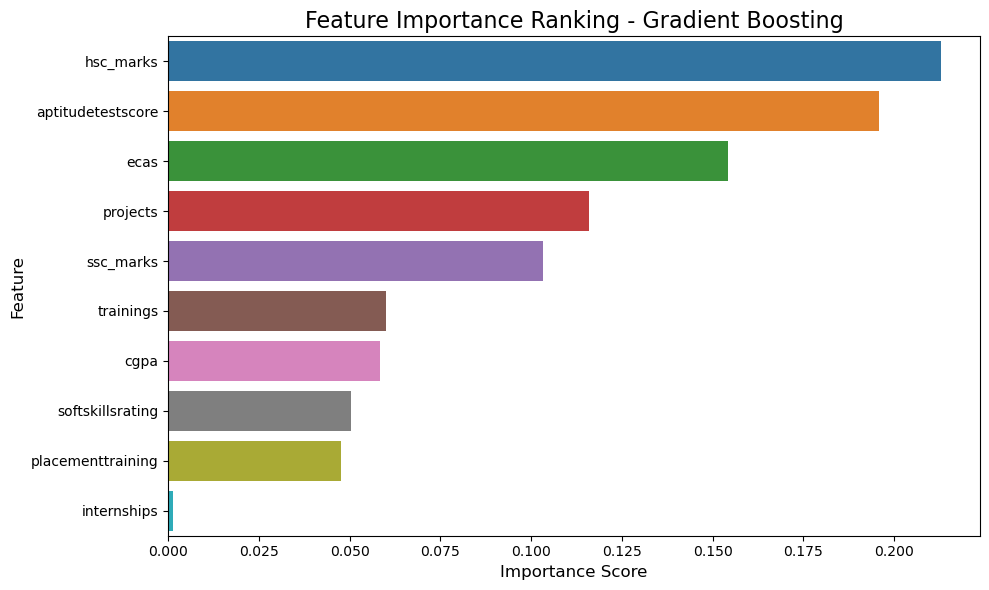

In [32]:
# Checking which features contributes the Gradient Boosting Classifier model's prediction
gb_importances = gb.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(gb_importances)[::-1]

# Plotting a DataFrame for better visualization
gb_data = pd.DataFrame({'Feature': feature_names, 'Importance': gb_importances})

gb_data = gb_data.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_data, hue='Feature',legend=False)
plt.title('Feature Importance Ranking - Gradient Boosting', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

#### **Summary of Feature Importance for Gradient Boosting**

The feature importance graph highlights the key variables influencing the Gradient Boosting model’s predictions for placement.  

- AptitudeTestScore is the most influential feature, indicating that aptitude assessments play a crucial role in placement outcomes.  
- Extracurricular Activities and HSC_Marks are also strong predictors, showing that both academic performance and non-academic involvement significantly impact placement chances.  
- Projects, SSC_Marks, and Workshops/Certifications have a moderate impact, suggesting that hands-on experience and early academic performance contribute to placement success.  
- CGPA, Placement Training, and Soft Skills Rating have lower importance scores but still influence the model.  
- Internships have the least impact, implying that they may not be a decisive factor in determining placements.  

This suggests that aptitude, academic performance, and extracurricular activities are the strongest indicators of placement success, while internships and soft skills play a lesser role in the Gradient Boosting model’s predictions.

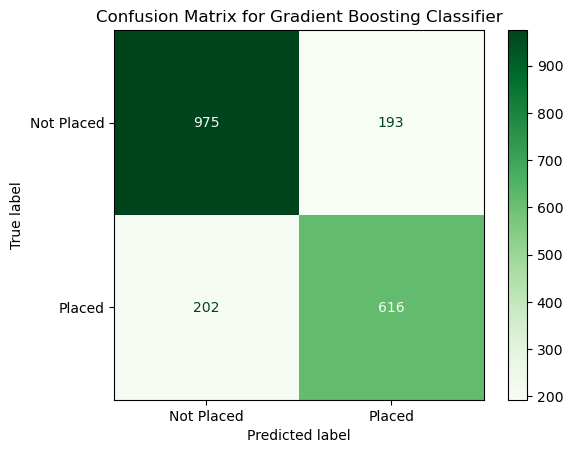

In [33]:
# Making a Confusion Matrix for the Model
gb_cm = confusion_matrix(y_test, gb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=gb_cm, 
                              display_labels=["Not Placed", "Placed"])
disp.plot(cmap='Greens')
disp.ax_.set_title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

#### **Confusion Matrix Summary for Gradient Boosting Classifier** 

- True Positives (Diagonal Elements):  
    - Not Placed: 975 instances were correctly predicted as not placed.  
    - Placed: 616 instances were correctly predicted as placed.  

- False Positives (Off-Diagonal Elements):  
    - Not Placed: 193 instances were misclassified as placed.  
    - Placed: 202 instances were misclassified as not placed.  

#### Observations:  
- The Gradient Boosting model shows the best balance between false positives and false negatives compared to KNN and Random Forest.  
- 193 not placed students were incorrectly classified as placed, which is the lowest among the three models.  
- 202 placed students were misclassified as not placed, slightly better than Random Forest but slightly worse than KNN.  
- The Gradient Boosting model appears to be the most stable and well-rounded so far, as it minimizes both types of errors effectively. 

---

<a id="evaluation"></a> 

## **4.6 Model Evaluation and Comparison**  

Assess the models using performance metrics and visual tools.

Based on the evaluation of the **Gradient Boosting Classifier (GB)**, **Random Forest (RF)**, and **K-Nearest Neighbors (KNN)** models for predicting student placement outcomes, the **Gradient Boosting Classifier** proves to be the most effective and balanced model for classification. Here are the final observations:

### **Data Preprocessing & Analysis**
- Duplicates Removed: 72 duplicate records were identified and removed.
- Univariate Analysis: Conducted count plots for categorical features, box plots, and histograms for numerical features.
- Bivariate Analysis: Examined relationships between each feature and placement status using count plots (categorical) and box plots (numerical).
- Multivariate Analysis: Used a heatmap to assess correlations between numerical features.
- Feature Transformation:
  - Categorical features were binary encoded.
  - Numerical features were standardized using StandardScaler.


### Model Performance**

| Model                | Accuracy | Precision | Recall | F1-score | Cross-Validation Score |
|----------------------|----------|-----------|--------|----------|------------------------|
| **Decision Tree (DT)**  | 70.69%   | 0.6976    | 0.6977 | 0.6977   | 0.7097                 |
| **K-Nearest Neighbors (KNN)** | 77.74%   | 0.7703    | 0.7707 | 0.7705   | 0.7730                 |
| **Random Forest (RF)**  | 78.60%   | 0.7805    | 0.7745 | 0.7769   | 0.7862                 |
| **Gradient Boosting (GB)** | 79.56%   | 0.7890    | 0.7892 | 0.7891   | 0.7975                 |

#### **Observations:**
- Gradient Boosting (GB) outperformed all other models in accuracy, recall, and F1-score, making it the most effective classifier.
- Random Forest (RF) performed well but had slightly higher false positives in placed students compared to GB.
- KNN showed good performance but struggled slightly in recall for placed students.
- Decision Tree (DT) had the lowest accuracy and was not selected for further tuning.


### **Hyperparameter Tuning Results**

| Model | Best Accuracy | Avg CV Score | Best Precision | Best Recall | Best F1-score (Placed) |
|--------|--------------|--------------|----------------|-------------|------------------------|
| **Random Forest (RF)** | 79.86%       | 79.38%        | 0.7606       | 0.7457      | 0.7531                 |
| **K-Nearest Neighbors (KNN)** | 79.76%       | 79.14%        | 0.7467       | 0.7604      | 0.7535                 |
| **Gradient Boosting (GB)** | 80.11%       | 79.78%        | 0.7614       | 0.7531      | 0.7575                 |

#### **Observations:**
- GB achieved the highest accuracy (80.11%) after hyperparameter tuning, with the best F1-score for placed students (0.7572).
- RF performed well but had slightly lower recall (0.7457) compared to GB (0.7531).
- GB consistently showed strong generalization ability across all performance metrics.


### **Class-Specific Metrics Across Hyperparameter-Tuned Models**

### **Comparison for "Not Placed" Class**
| Model | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| **Random Forest (RF)** | 0.8243 | 0.8356 | 0.8299 |
| **K-Nearest Neighbors (KNN)** | 0.8193 | **0.8401** | 0.8296 |
| **Gradient Boosting (GB)** | **0.8284** | 0.8348 | **0.8316** |

#### **Observations:**
- GB had the highest F1-score (0.8316), showing better balance between precision and recall.
- RF performed slightly better in Recall than GB (0.8356 vs. 0.8348), but GB had better overall balance.
- KNN had the lowest Precision but highest Recall (0.8401), meaning it predicted more "Not Placed" students correctly but at the cost of more false positives.

### **Comparison for "Placed" Class**
| Model | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| **Random Forest (RF)** | 0.7606 | 0.7457 | 0.7531 |
| **K-Nearest Neighbors (KNN)** | 0.7467 | **0.7604** | 0.7535 |
| **Gradient Boosting (GB)** | **0.7614** | 0.7531 | **0.7572** |

#### **Observations:**
- GB had the best balance across Precision (0.7614), Recall (0.7531), and F1-score (0.7572).
- KNN had the highest Recall (0.7604), meaning it correctly identified more placed students but at the cost of slightly lower Precision.
- RF had the highest Precision (0.7606), meaning fewer false positives, but it had the lowest Recall (0.7457), meaning it missed more placed students.


### **Error Analysis**
- GB Model had the lowest number of misclassifications, making it the most robust model.
- RF Model had slightly higher false positives for placed students, making it less optimal than GB.
- KNN Model struggled slightly with recall for placed students, leading to more false negatives.


### **Final Conclusion**
Through exploratory data analysis, feature engineering, and rigorous model evaluation, the Gradient Boosting Classifier emerged as the best model for student placement prediction. It outperformed other models in accuracy, precision, recall, and F1-score, while maintaining strong stability in cross-validation. 

The insights from this study can help universities identify key factors affecting placements and enhance career support strategies for students.

#### Thank you, Feedback would be appreciated!!!